<a href="https://colab.research.google.com/github/Alexiane-lc/dairy_book/blob/main/Practice_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECAS-SFdS course on Textmining -- Practice Lab 1

**Aim:** to see basic concepts of text representation 

**Roadmap**

1. Data acquisition and loading
2. Representation 
3. Summaries


In [1]:
# Some basics (for recall purpouses)
text = 'This short pharse is a character string.'

print("First index at 0 :" + text[0])   
print("Subsetting : " + text[1:5])  # subsetting

start = text.find('character')

print("Where 'character' starts : " + str(start))
print("Subsetting around the word 'character' : " + text[start-5:start+5])

First index at 0 :T
Subsetting : his 
Where 'character' starts : 23
Subsetting around the word 'character' : is a chara


## Data Acquisition

Text can come from different sources and in different shapes :

- handwritten notes
- scanned documents
- digitally native 
  - documents, mails, ... 
  - web pages (articles, blogs, )
  - social media

### Handwritten documents

--2021-10-11 14:44:48--  https://git.msh-lse.fr/eric/ecas-sfds-course-on-textmining/-/raw/main/sample-docs/handwritten-note.jpg?inline=false
Resolving git.msh-lse.fr (git.msh-lse.fr)... 193.48.145.15
Connecting to git.msh-lse.fr (git.msh-lse.fr)|193.48.145.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241601 (236K) [image/jpeg]
Saving to: ‘handwritten-note.jpg’

handwritten-note.jp 100%[===================>] 235.94K   233KB/s    in 1.0s    

2021-10-11 14:44:50 (233 KB/s) - ‘handwritten-note.jpg’ saved [241601/241601]



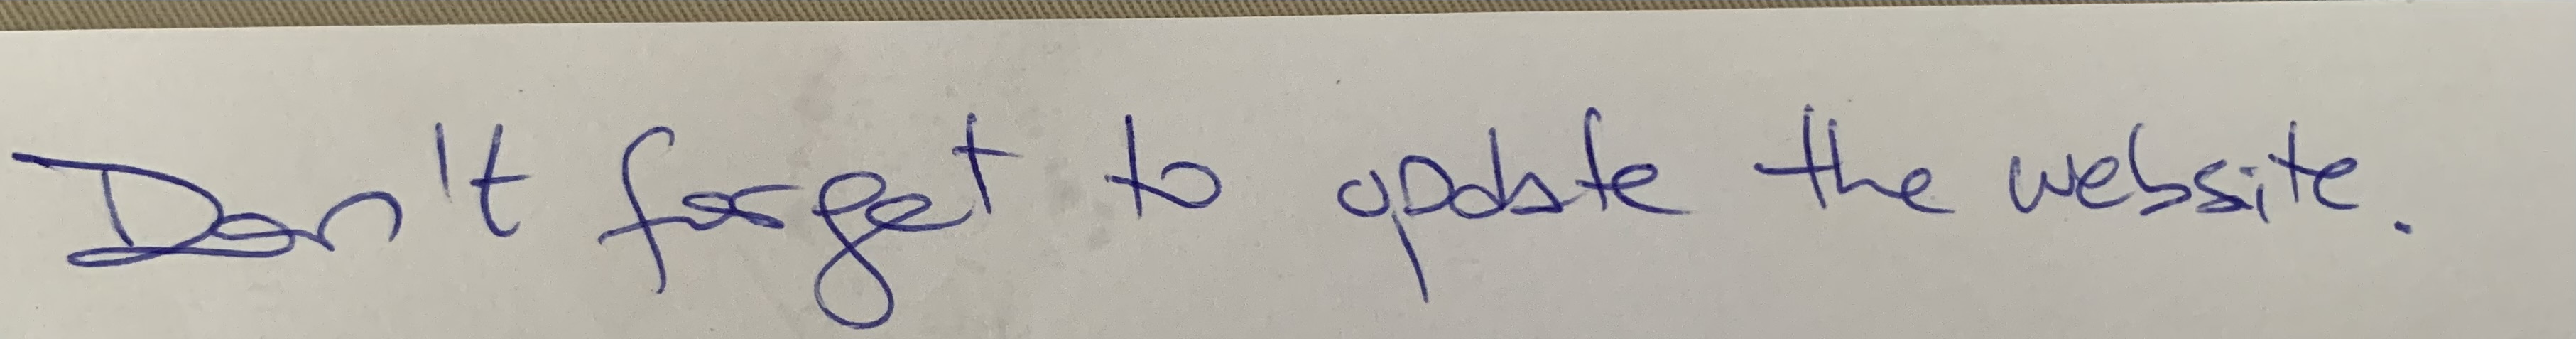

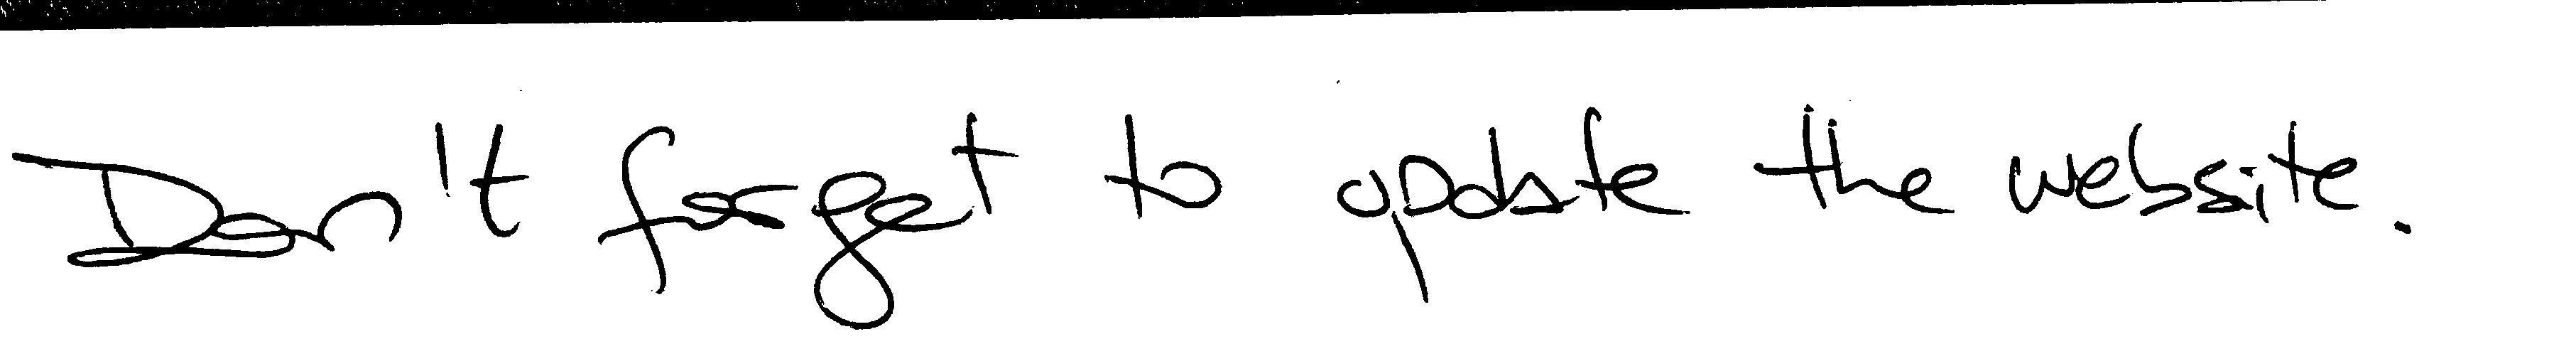

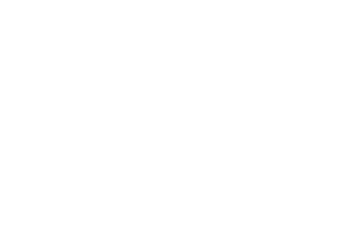

In [2]:
!wget -O handwritten-note.jpg https://git.msh-lse.fr/eric/ecas-sfds-course-on-textmining/-/raw/main/sample-docs/handwritten-note.jpg?inline=false
#wget is not python - il apparait ensuite dans la barre sur le cote gauche
import cv2 #open images and videos
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #display image

image = cv2.imread("handwritten-note.jpg") #the image is read
image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) #pour faire tourner l'image car pas dans le bon sens
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #image transformed into a scale of gray
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] #convert the image into 2 colors = black or white

plt.axis('off')

cv2_imshow(image)
cv2_imshow(gray)

# provides preprocessed image

In [3]:
# Setup
!sudo apt-get install tesseract-ocr #apt-get linked to linux
!pip install pytesseract
import pytesseract
from pytesseract import Output

#par defaut, il installe seulement le package pour l'anglais, pour d'autre langues il faut réinstaller des packages

# More information about tesseract-ocr : https://github.com/madmaze/pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,775 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
d = pytesseract.image_to_string(gray, output_type=Output.DICT)
print(d['text'])

print(pytesseract.image_to_boxes(gray))

po lt focges to opdate the website,

p 17 101 272 263 0
o 3627 0 3627 0 0
l 3627 0 3627 0 0
t 613 143 745 305 0
f 842 63 960 300 0
o 960 63 1021 300 0
c 1021 63 1082 300 0
g 1082 63 1124 300 0
e 1189 13 1280 236 0
s 1340 175 1434 319 0
t 1555 169 1629 316 0
o 1629 169 1721 316 0
o 1883 171 1917 238 0
p 1917 171 1957 238 0
d 2009 51 2087 298 0
a 2087 51 2192 298 0
t 2192 51 2224 298 0
e 2257 175 2380 327 0
t 2469 176 2558 331 0
h 2558 176 2637 331 0
e 2637 176 2752 331 0
w 2829 176 2911 261 0
e 2911 176 2964 261 0
b 2964 176 3000 261 0
s 3016 173 3086 304 0
i 3121 177 3173 253 0
t 3176 163 3195 218 0
e 3225 182 3291 307 0
, 3371 148 3395 166 0



### Digitally native documents

In [ ]:
!pip install PyPDF2  # Install extra module
import PyPDF2       # Load module
from PyPDF2 import PdfFileReader

# Open with your browser the link below
!wget "https://donneespubliques.meteofrance.fr/donnees_libres/bulletins/BQA/20210803.pdf"
FILE = "20210803.pdf"

     |████████████████████████████████| 77 kB 6.6 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=aaa919347bda351f50c2527c93c89d5ebbc7f946d56339f56e04b80c4fe28926
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
--2021-10-11 07:39:29--  https://donneespubliques.meteofrance.fr/donnees_libres/bulletins/BQA/20210803.pdf
Resolving donneespubliques.meteofrance.fr (donneespubliques.meteofrance.fr)... 137.129.43.49
Connecting to donneespubliques.meteofrance.fr (donneespubliques.meteofrance.fr)|137.129.43.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2972333 (2.8M) [application/pdf]
Saving to: ‘20210803.pdf’

20210803.pdf        100%[===================>]   2.83M   842KB/s    in 3.4s    

2021-10-11 07:39:33 (842 KB/s) - ‘20210803.pdf’ saved [2972333/2972333]



In [ ]:
# Quite uninteresting informations
with open(FILE, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        print(information)
    
pdfFileObject = open(FILE, 'rb')            # PDF Object
pdfReader = PyPDF2.PdfFileReader(pdfFileObject) # PDF reader object

text=''
for i in range(0,pdfReader.numPages):
    # creating a page object
    pageObj = pdfReader.getPage(i)
    # extracting text from page
    text=text+pageObj.extractText()

print("\n--------------- Exraction ---------------\n")
print(text) 

{'/CreationDate': "D:20210804085159+02'00'", '/Creator': 'Adobe InDesign 16.2 (Windows)', '/ModDate': "D:20211004110210+02'00'", '/Producer': 'Adobe PDF Library 15.0', '/Trapped': '/False'}

--------------- Exraction ---------------

Bulletin Climatique Quotidien du mardi 3 août 2021HBBHB1113131291914131413121610101014161515181813131112141314131412121315161613151012151410718151411914141316914121413151313121412151314121313161617131314121413149151514141813141413151820215141514121513141418151203/08/20210246810121416182022242628303234363840421317030106212400113913110000841111117004998861462681898918860188510000537716640020110922259455313152502114110300611965430104903/08/20211510203040506080100120150200mm2220202824262222202922302019162019182130282021181821182720191717183025242227191818192315222318221817191922191918202021182019181918212219212123242821202420201620222019202533301818172129272721191821171820191929201803/08/2021024681012141618202224262830323436384042203025414435371951392436372823

In [ ]:
import re
clean_txt = re.sub("™", "'", text)
text


'Bulletin Climatique Quotidien du mardi 3 août 2021HBBHB1113131291914131413121610101014161515181813131112141314131412121315161613151012151410718151411914141316914121413151313121412151314121313161617131314121413149151514141813141413151820215141514121513141418151203/08/20210246810121416182022242628303234363840421317030106212400113913110000841111117004998861462681898918860188510000537716640020110922259455313152502114110300611965430104903/08/20211510203040506080100120150200mm2220202824262222202922302019162019182130282021181821182720191717183025242227191818192315222318221817191922191918202021182019181918212219212123242821202420201620222019202533301818172129272721191821171820191929201803/08/202102468101214161820222426283032343638404220302541443537195139243637282322373119393544482622183643282627322133312121332922303026362420252927263710182226333343362641383357253633283132293036574120391541232635263326502824272835334071282862402525301946344637km/h>= 140< 2003/08/2021614248507219311692778280211

### Your turn 

Try to load the daily weather report from Met Office UK using this link

https://digital.nmla.metoffice.gov.uk/download/file/IO_8399517f-6890-44b7-8a48-e2880f78d511



In [ ]:
# url : https://digital.nmla.metoffice.gov.uk/download/file/IO_8399517f-6890-44b7-8a48-e2880f78d511




## Representation

In [ ]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

with open("La_Bruna_2018.final.txt") as f:
    lines = [line.strip() for line in f.readlines()]

tf_vectorizer = CountVectorizer() 
#tf_vectorizer = CountVectorizer(stop_words=['the','we','should','this','to','and','all','of','by','for']) 
tf_vectorizer.fit(lines)

X = tf_vectorizer.transform(lines)
X = X.toarray()
features = tf_vectorizer.get_feature_names()

(num_doc, num_f) = X.shape

print(X.shape)



(201, 1404)


In [ ]:
# Wordcloud : an oversimplified summary of the text 

cloud_labels = features

cloud_weights = np.sum(X, axis=0)                   # sum across lines
dictionary = dict(zip(cloud_labels, cloud_weights)) # paste features names & weigths
sorted_by_value = sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_by_value[0:50])

[('al', 108), ('et', 108), ('fault', 108), ('messinian', 106), ('faults', 82), ('in', 71), ('fig', 70), ('throw', 68), ('early', 53), ('with', 47), ('are', 37), ('alpi', 35), ('monte', 35), ('profile', 35), ('which', 35), ('both', 32), ('is', 32), ('were', 32), ('at', 31), ('lower', 29), ('pre', 29), ('as', 28), ('geometry', 28), ('for', 26), ('set', 26), ('basin', 25), ('computed', 25), ('during', 23), ('was', 23), ('data', 22), ('carbonates', 21), ('cretaceous', 21), ('foreland', 21), ('profiles', 21), ('that', 21), ('ca', 20), ('system', 20), ('an', 19), ('post', 19), ('two', 18), ('shows', 17), ('values', 17), ('displacement', 16), ('geological', 16), ('network', 16), ('nw', 16), ('on', 16), ('shaped', 16), ('stratigraphic', 16), ('structural', 16)]


In [ ]:
from wordcloud import WordCloud

limit = 50
fontcolor='#afafaf'
bgcolor = '#000000'

wordcloud = WordCloud(
    max_words=limit,
    background_color=bgcolor,
).fit_words(dictionary)

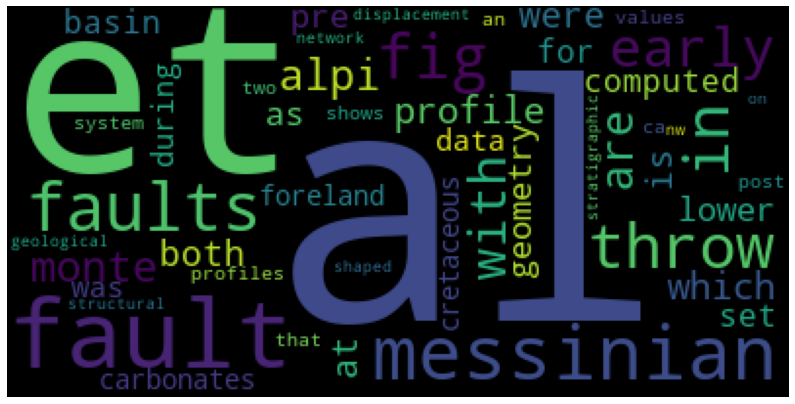

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

title = "Wordcloud"

plt.imshow(wordcloud)
plt.axis('off')
plt.show()